In [5]:
import numpy as np
import CADMium as cad
import matplotlib.pyplot as plt

a = 4.9322/2

Za = 2
Zb = 2

pol = 1

Nmo_a = [[1]]
Na   = [[2]]
nua  = 1

Nmo_b = [[1]]
Nb    = [[2]]
nub   = 1

Nmo = [[2]]
Nm  = [[4]]

optPartition = {"AB_SYM" : False,
                "ENS_SPIN_SYM" : True}

NP = 7
NM = [4, 4]
L = np.arccosh(12/a)
loc = np.array(range(-4,5))

grid = cad.Psgrid(NP, NM ,a, L, loc)
grid.initialize()

ks = cad.Kohnsham(grid, Za, Zb, pol, Nmo, Nm, {})
ks.scf({})


 Constructing integration weights ... 

 Building finite difference opperators ... 

 Factorizing Laplacian ... 

 Done
 iter    Total Energy     HOMO Eigenvalue         Res       

----------------------------------------------------------- 

   1         -7.238          -0.372            1.0
   2         -6.114          -0.516            0.18383499680652243
   3         -5.800          -0.553            0.05415850944356651
   4         -5.710          -0.563            0.015730975920592798
   5         -5.683          -0.565            0.0047204630731899596
   6         -5.675          -0.565            0.0014817315253220335
   7         -5.671          -0.566            0.0005751385675772333
   8         -5.671          -0.566            0.00014474810668715045
   9         -5.671          -0.566            7.011023450159625e-05
   10         -5.671          -0.566            3.430382835614664e-05
   11         -5.671          -0.566            1.688659933782117e-05
   12         -5.

In [6]:
ks.E.E

-5.670495229536985

(-5.0, 5.0)

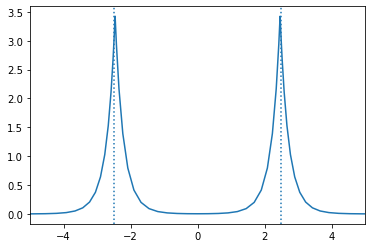

In [7]:
x, na = X.axis_plot(ks.n[:,0])

plt.plot(x,na)

plt.axvline(x=-2.5, ls=":")
plt.axvline(x= 2.5, ls=":")

plt.xlim(-5,5)


In [8]:
dm.shape

NameError: name 'dm' is not defined

In [9]:
#Set up Inversion
dm = ks.n

#Options
optInversion = {"invert_type" : "wuyang"}

#Set up objects
#Partition object required for initial guess
P  = cad.Pssolver( X, Nmo, Nm )
WY = cad.Inverter( X, P, optInversion )
part = cad.Partition( X, Za, Zb, pol, Nmo_a, Na, nua, Nmo_b, Nb, nub, {} )


part.optPartition.isolated = True
part.scf({"disp" : True, 
          "e_tol" : 1e-7})


In [16]:
dm.shape

(625, 1)

In [11]:
#Get initial guess
phi0, e0, v0 = part.initialguessinvert(ispin=0) 
success, inv_info = WY.invert( dm, v0, phi0, e0, )

In [12]:
vs = WY.vs[:,0]

ks.set_veff_external(vs)
n_inv = ks.calc_density()

In [20]:
print(phi0.shape)
print(dm.shape)

(625, 1)
(625, 1)


In [ ]:
x_inv, y_inv = X.axis_plot(n_inv)

In [ ]:
print("Comparison of target and scf density with inverted potential")
plt.plot(x_inv, y_inv)
plt.plot(x,na)

In [ ]:
plt.plot( x, np.abs(y_inv[:,0]-na))